In [25]:
# Import relevant modules
# ImagePrediction is a helper module (helpers/image_models) that assists with setting up the image recognition models
# and getting a prediction.
from helpers.image_models import ImagePrediction
# Ground truth helper so we can see the ground truth of an Imagenet image.
from validate_ground_truth.imagenet_ground_truth import ImagenetGroundTruth
# Instantiates the ImagePrediction object with the vgg16 model
predictor = ImagePrediction(model_name="vgg16")
# Instantiates the ImagenetGroundTruth object
ground_truth = ImagenetGroundTruth()
from PIL import Image
import math

In [26]:
import tensorflow as tf
import os
import pathlib
from helpers.image_models import decode_predictions
from pprint import pprint

dataset_path = pathlib.Path(os.getcwd() + "/initial_test_set")
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path.as_posix(), 
    image_size=(224, 224), 
    batch_size=32,
    shuffle=False
)

# get predictions with filenames
predictions = predictor.model.predict(image_dataset)

decoded = decode_predictions(predictions, top=1)

for i, image in enumerate(image_dataset.file_paths):
    print(f"Filename: {image.split('/')[-1]}")
    print(f"Prediction: {decoded[i]}")


Found 10 files belonging to 1 classes.
1/1 [==============================] - 0s 375ms/step
Filename: arctic-fox.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.9508855)]
Filename: castle.jpg
Prediction: [('n02980441', 'castle', 0.97413325)]
Filename: iguana.jpg
Prediction: [('n01677366', 'common_iguana', 0.97907984)]
Filename: llama.jpg
Prediction: [('n02437616', 'llama', 0.96955395)]
Filename: salmon.jpg
Prediction: [('n02536864', 'coho', 0.87779117)]
Filename: siamese_cat.jpg
Prediction: [('n02123597', 'Siamese_cat', 0.9406723)]
Filename: tennis_racket.jpg
Prediction: [('n04039381', 'racket', 0.88522977)]
Filename: tiger.jpg
Prediction: [('n02129604', 'tiger', 0.9228468)]
Filename: truck.jpg
Prediction: [('n04467665', 'trailer_truck', 0.8349612)]
Filename: wolf.jpg
Prediction: [('n02114367', 'timber_wolf', 0.8401966)]


In [27]:
# 10 transformation functions
# 1. flip (metamorphic)
def flip_image(image, direction):
    return image.transpose(method=direction)
# 2. rotate (metamorphic)
def rotate_image(image, degrees):
    return image.rotate(degrees)
# 3. zoom
def zoom_image(image, zoom_factor):
    return image.resize((int(image.width * zoom_factor), int(image.height * zoom_factor)))
# 4. brightness
def brightness_image(image, factor):
    return image.point(lambda p: p * factor)
# 5. contrast
def contrast_image(image, factor):
    return image.point(lambda p: p * factor)
# 6. saturation
def saturation_image(image, factor):
    return image.point(lambda p: p * factor)
# 7. hue
def hue_image(image, factor):
    return image.point(lambda p: p * factor)
# 8. shear
def shear_image(image, factor):
    return image.transform(image.size, Image.AFFINE, (1, factor, 0, 0, 1, 0))
# 9. remove a channel
def remove_channel(image, channel):
    r, g, b = image.split()
    if channel == "r":
        return Image.merge("RGB", (g, b, b))
    elif channel == "g":
        return Image.merge("RGB", (r, b, b))
    elif channel == "b":
        return Image.merge("RGB", (r, g, g))
    else:
        return image
# 10. spread
def spread_image(image, factor):
    return image.effect_spread(int(math.floor(image.width * factor)))

In [28]:
# automatically generate transformed images for each image in the dataset and save them to a new directory
def generate_transformed_images(dataset_path, output_path, transformations):
    for subdir, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            image = Image.open(file_path)
            for transform in transformations:
                for i in range(1,11):
                    if transform.__name__ == "rotate_image":
                        transformed_image = transform(image, i * 34)
                    elif transform.__name__ == "zoom_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "brightness_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "contrast_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "saturation_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "hue_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "shear_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "remove_channel":
                        if i == 1:
                            transformed_image = transform(image, "r")
                        elif i == 2:
                            transformed_image = transform(image, "g")
                        elif i == 3:
                            transformed_image = transform(image, "b")
                        else:
                            continue
                    elif transform.__name__ == "spread_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "flip_image":
                        if i == 1:
                            transformed_image = transform(image, Image.Transpose.FLIP_LEFT_RIGHT)
                        elif i == 2:
                            transformed_image = transform(image, Image.Transpose.FLIP_TOP_BOTTOM)
                        else:
                            continue

                    output_file_path = os.path.join(output_path, f"{file.split('.')[0]}_{transform.__name__}_{i}.jpg")
                    transformed_image.save(output_file_path)

generate_transformed_images(dataset_path, "output_set/test", [flip_image, rotate_image, zoom_image, brightness_image, contrast_image, saturation_image, hue_image, shear_image, remove_channel, spread_image])

In [29]:
transformed_dataset_path = pathlib.Path(os.getcwd() + "/output_set")
transformed_image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    transformed_dataset_path.as_posix(), 
    image_size=(224, 224), 
    batch_size=32,
    shuffle=False
)

# create a new dataset from the transformed images
predictions = predictor.model.predict(transformed_image_dataset)

decoded = decode_predictions(predictions, top=1)

for i, image in enumerate(transformed_image_dataset.file_paths):
    print(f"Filename: {image.split('/')[-1]}")
    print(f"Prediction: {decoded[i]}")

Found 850 files belonging to 1 classes.


27/27 [==============================] - 6s 121ms/step
Filename: arctic-fox_brightness_image_1.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.17126878)]
Filename: arctic-fox_brightness_image_10.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.9342362)]
Filename: arctic-fox_brightness_image_2.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.62849325)]
Filename: arctic-fox_brightness_image_3.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.76765776)]
Filename: arctic-fox_brightness_image_4.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.82403)]
Filename: arctic-fox_brightness_image_5.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.8746324)]
Filename: arctic-fox_brightness_image_6.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.8464862)]
Filename: arctic-fox_brightness_image_7.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.85036623)]
Filename: arctic-fox_brightness_image_8.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.90992355)]
Filename: arctic-fox_brightness_image_9.jpg
Prediction: [('n02120079

In [30]:
def group_predictions_by_original_image(predictions, origin_dat, transform_dat):
    grouped_predictions = {}

    for i, image in enumerate(origin_dat):
        grouped_predictions[image.split('/')[-1].split('.')[0]] = {
            'contrast': {},
            'brightness': {},
            'zoom': {},
            'rotate': {},
            'flip': {},
            'shear': {},
            'remove_channel': {},
            'spread': {},
            'hue': {},
            'saturation': {}
        }

    for i, image in enumerate(transform_dat):
        image_name = image.split('/')[-1]
        for j, original_image in enumerate(grouped_predictions.keys()):
            if original_image in image_name:
                category = image_name.split('_')[1]
                if category == "cat" or category == "racket":
                    category = image_name.split('_')[2]

                if category == "remove":
                    category = "remove_channel"
                
                grouped_predictions[original_image][category][image_name] = (predictions[i][0][1], predictions[i][0][2])

    return grouped_predictions
        

grouped_predictions = group_predictions_by_original_image(decoded, image_dataset.file_paths, transformed_image_dataset.file_paths)
pprint(grouped_predictions)

{'arctic-fox': {'brightness': {'arctic-fox_brightness_image_1.jpg': ('Arctic_fox',
                                                                     0.17126878),
                               'arctic-fox_brightness_image_10.jpg': ('Arctic_fox',
                                                                      0.9342362),
                               'arctic-fox_brightness_image_2.jpg': ('Arctic_fox',
                                                                     0.62849325),
                               'arctic-fox_brightness_image_3.jpg': ('Arctic_fox',
                                                                     0.76765776),
                               'arctic-fox_brightness_image_4.jpg': ('Arctic_fox',
                                                                     0.82403),
                               'arctic-fox_brightness_image_5.jpg': ('Arctic_fox',
                                                                     0.8746324),
             

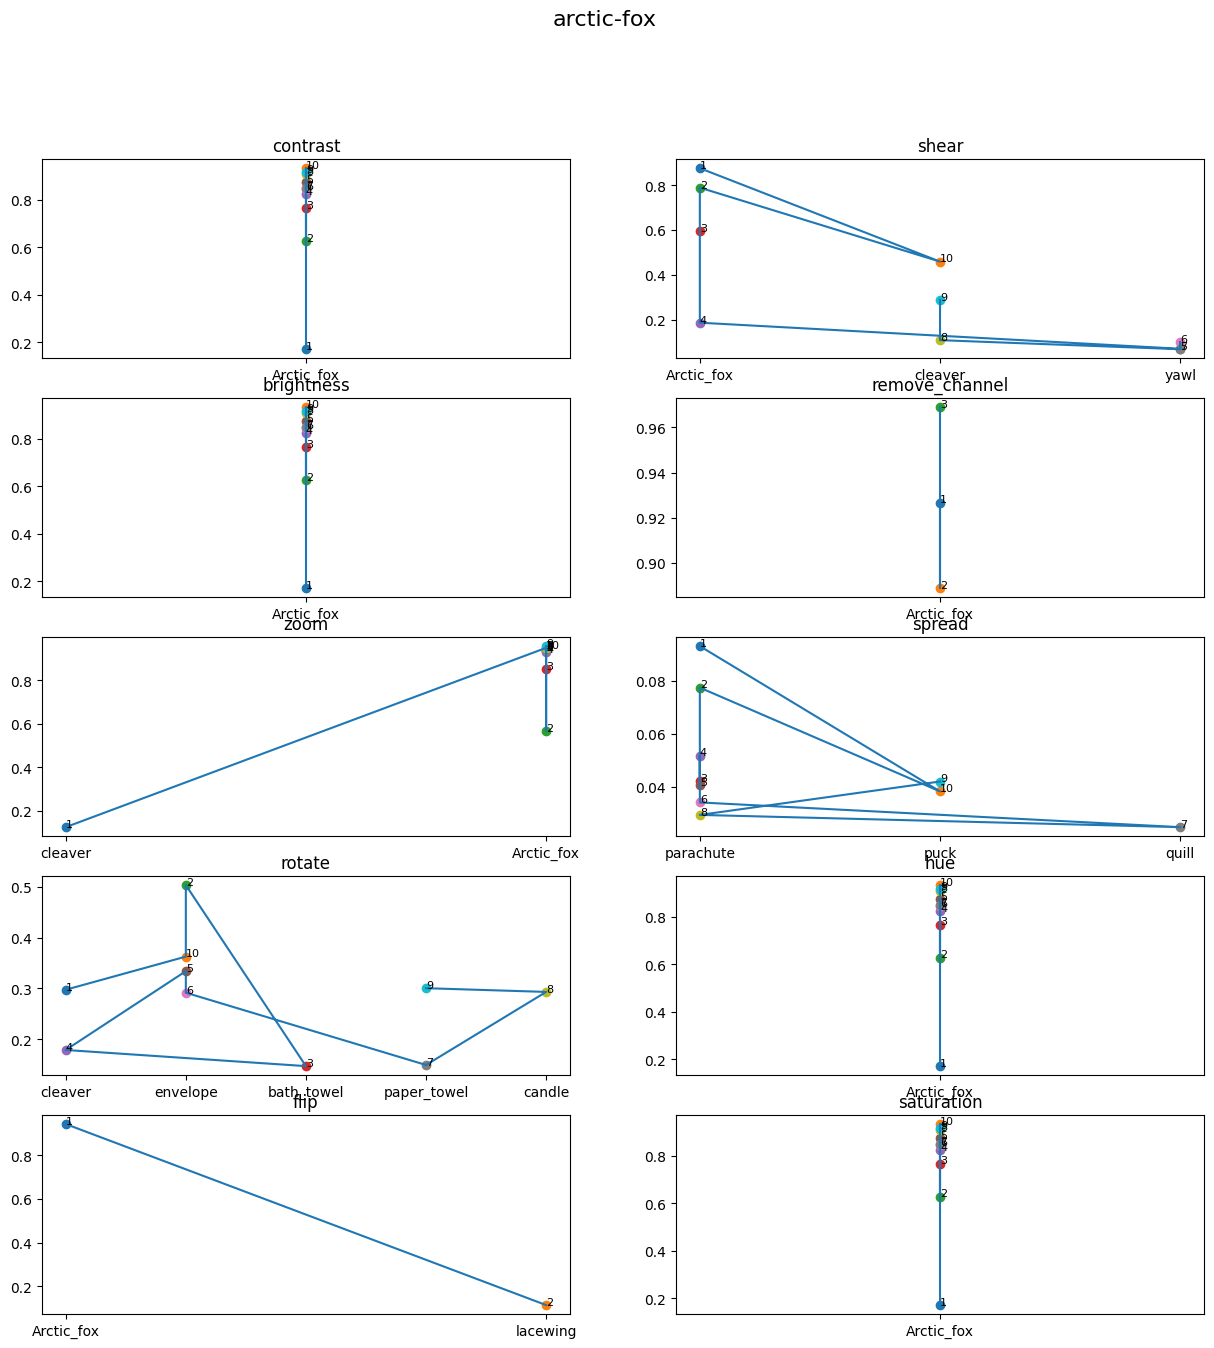

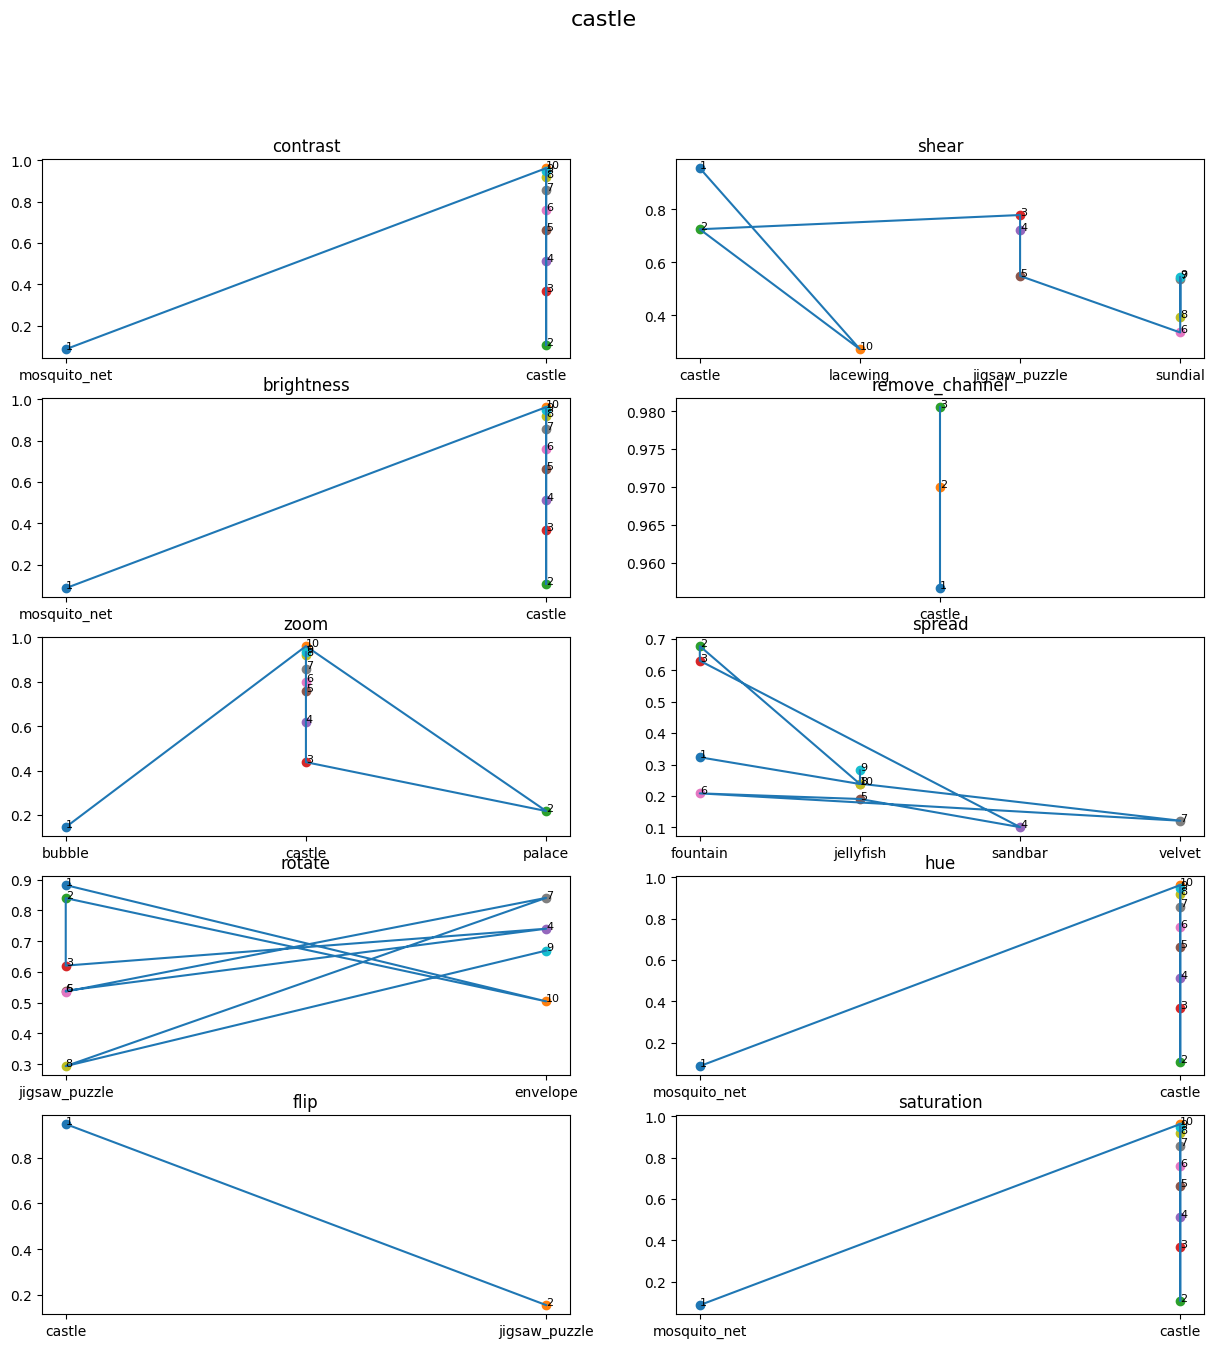

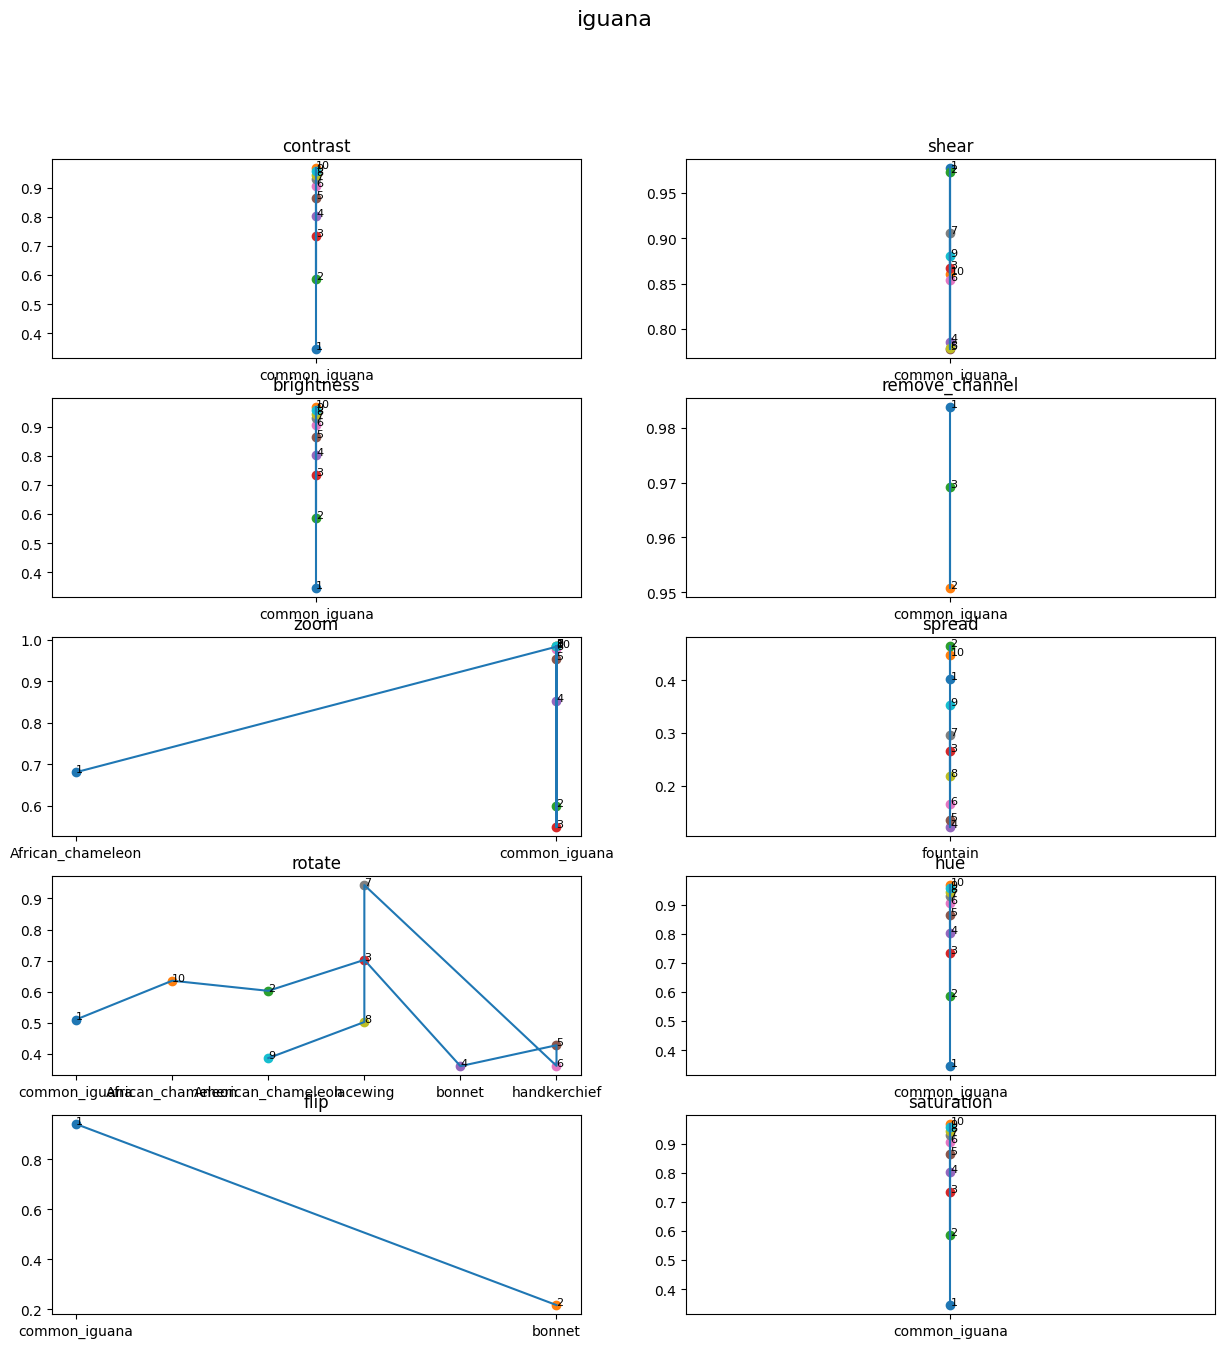

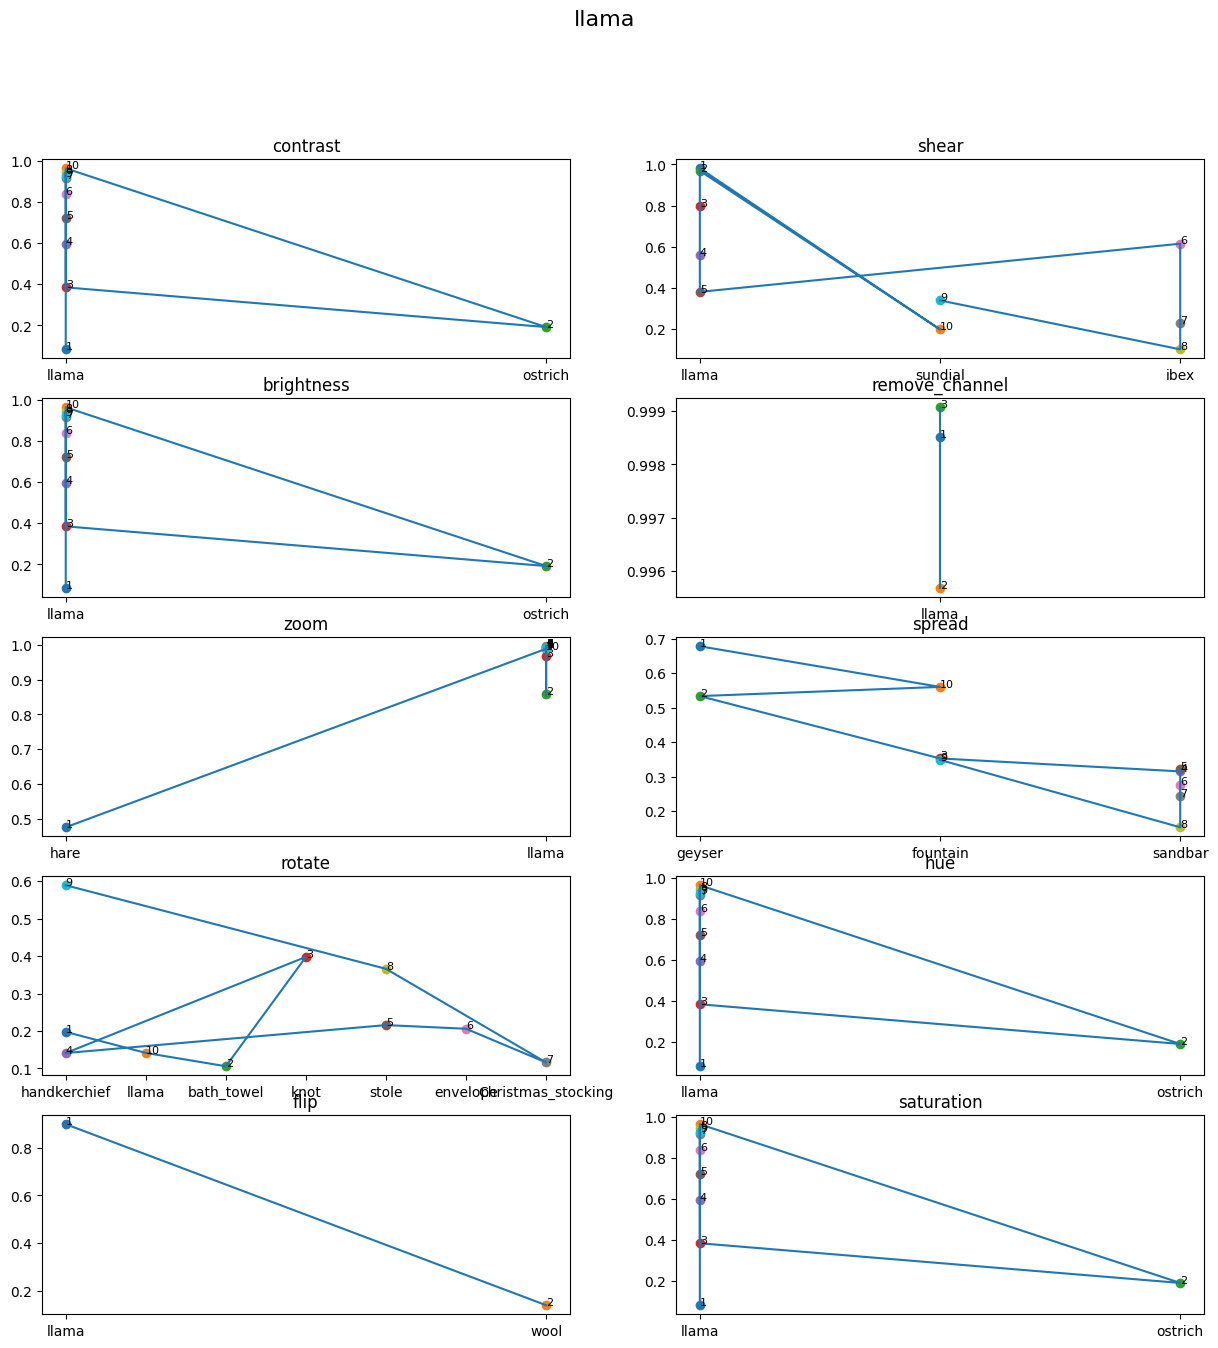

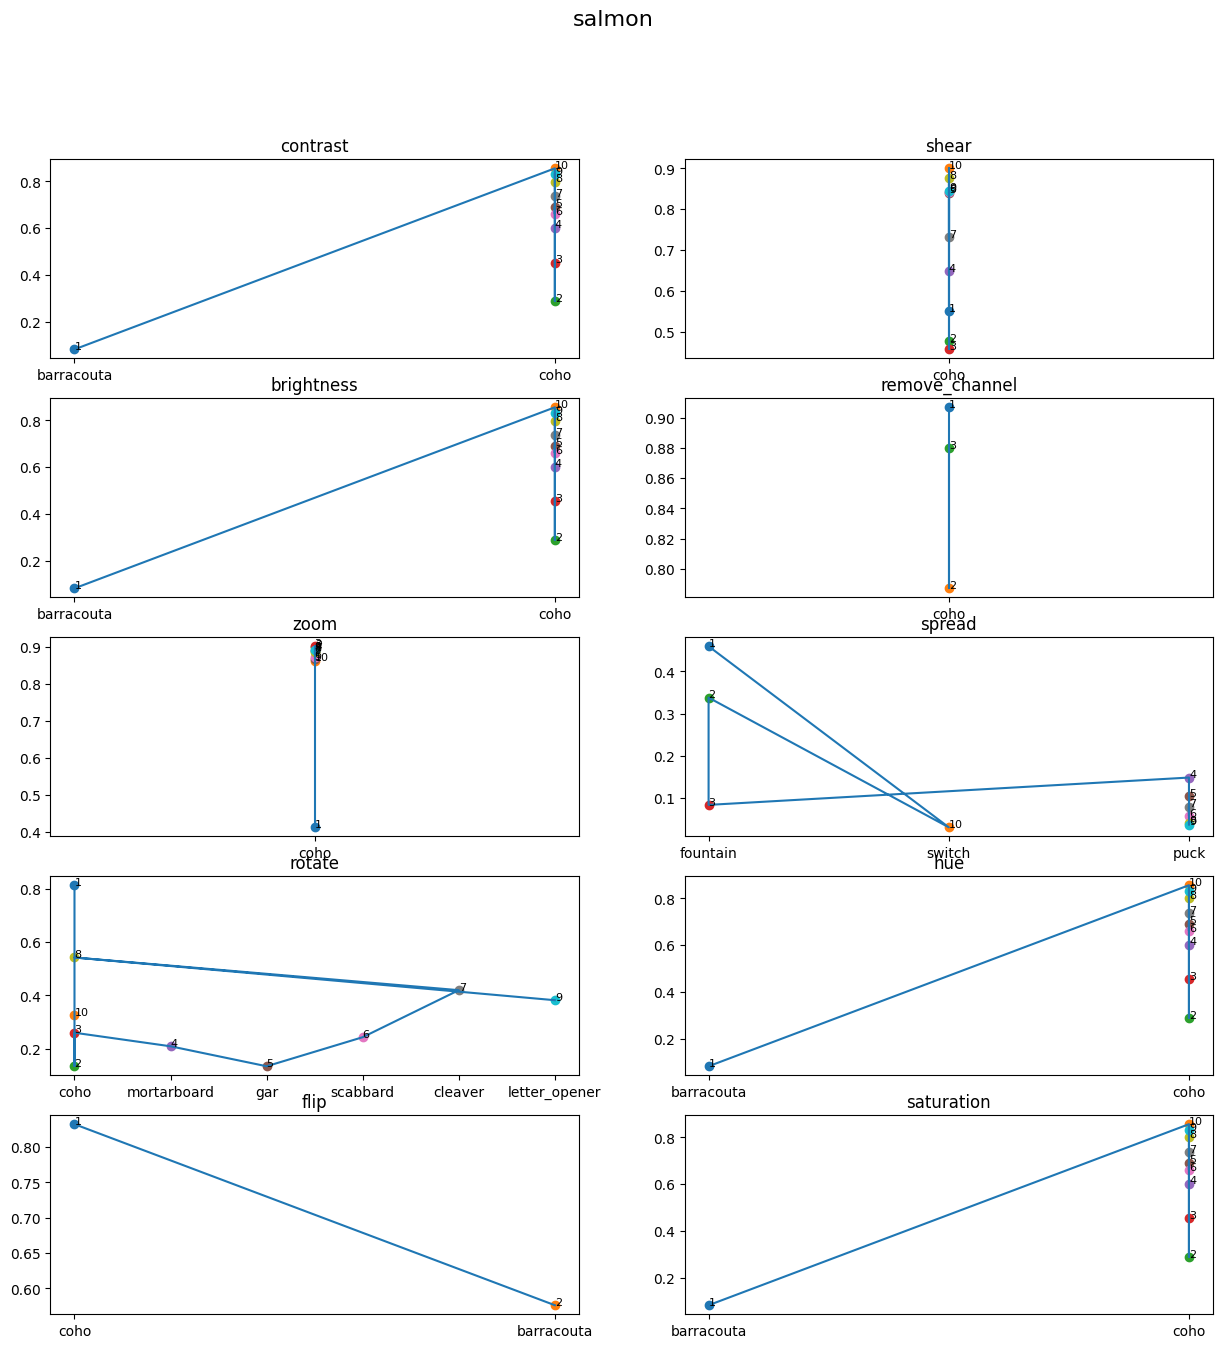

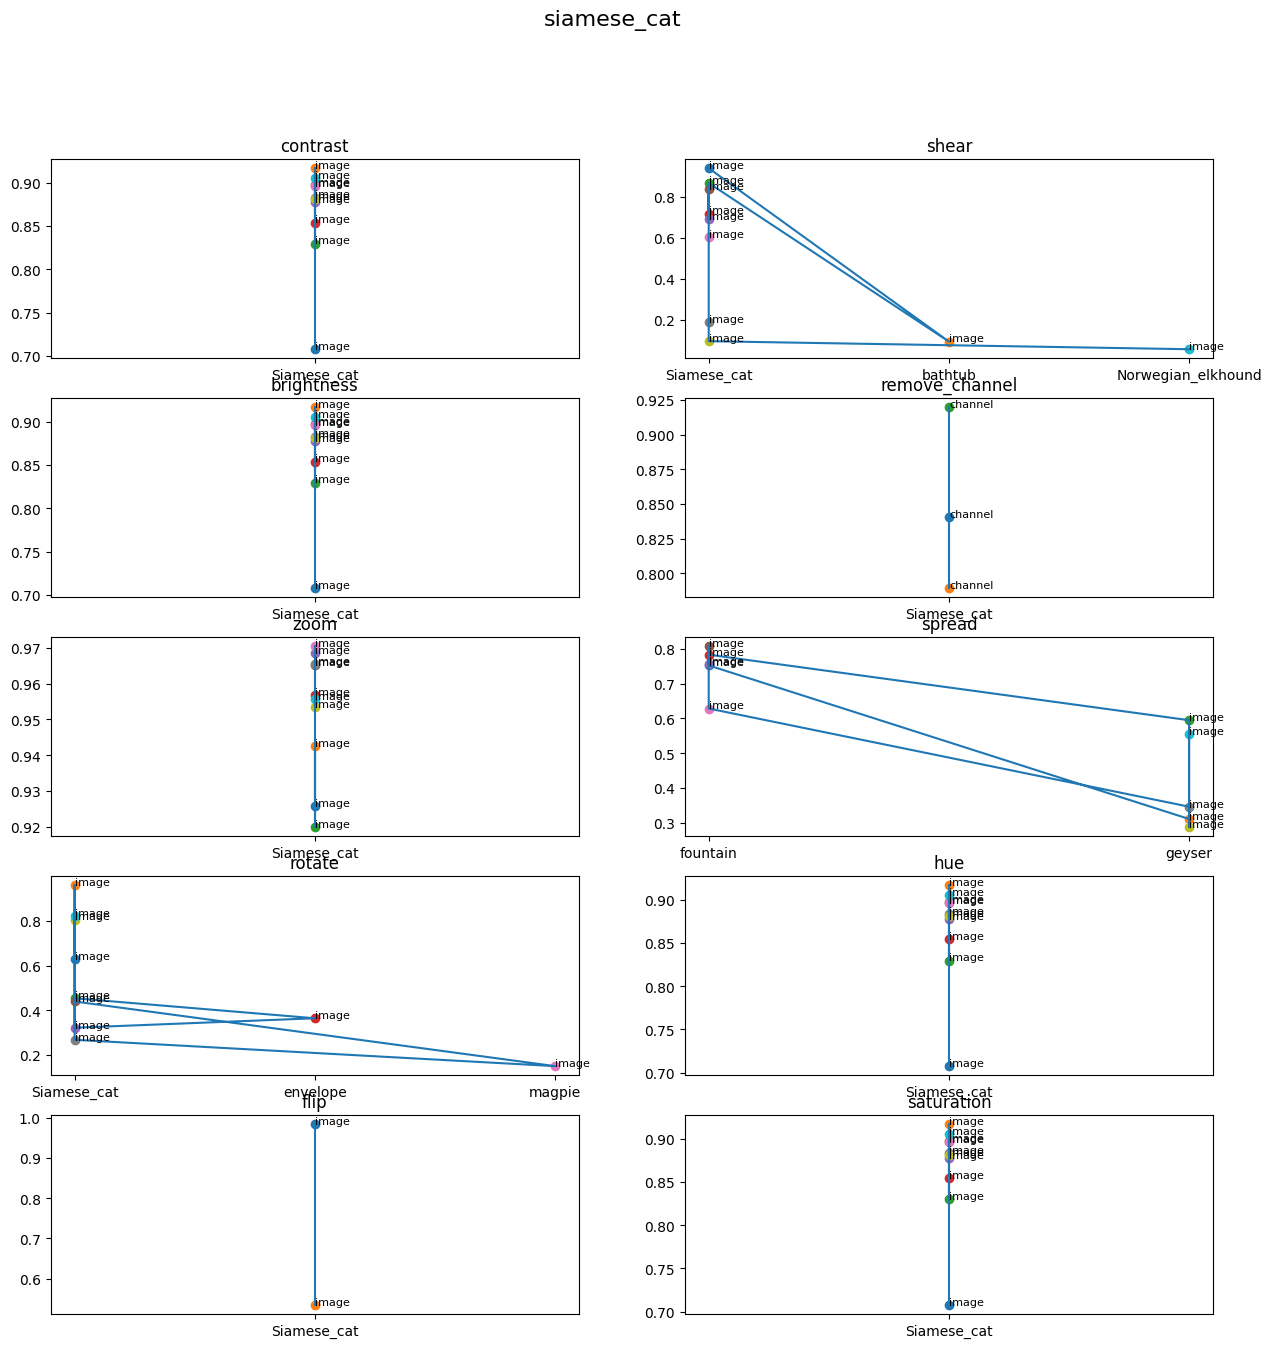

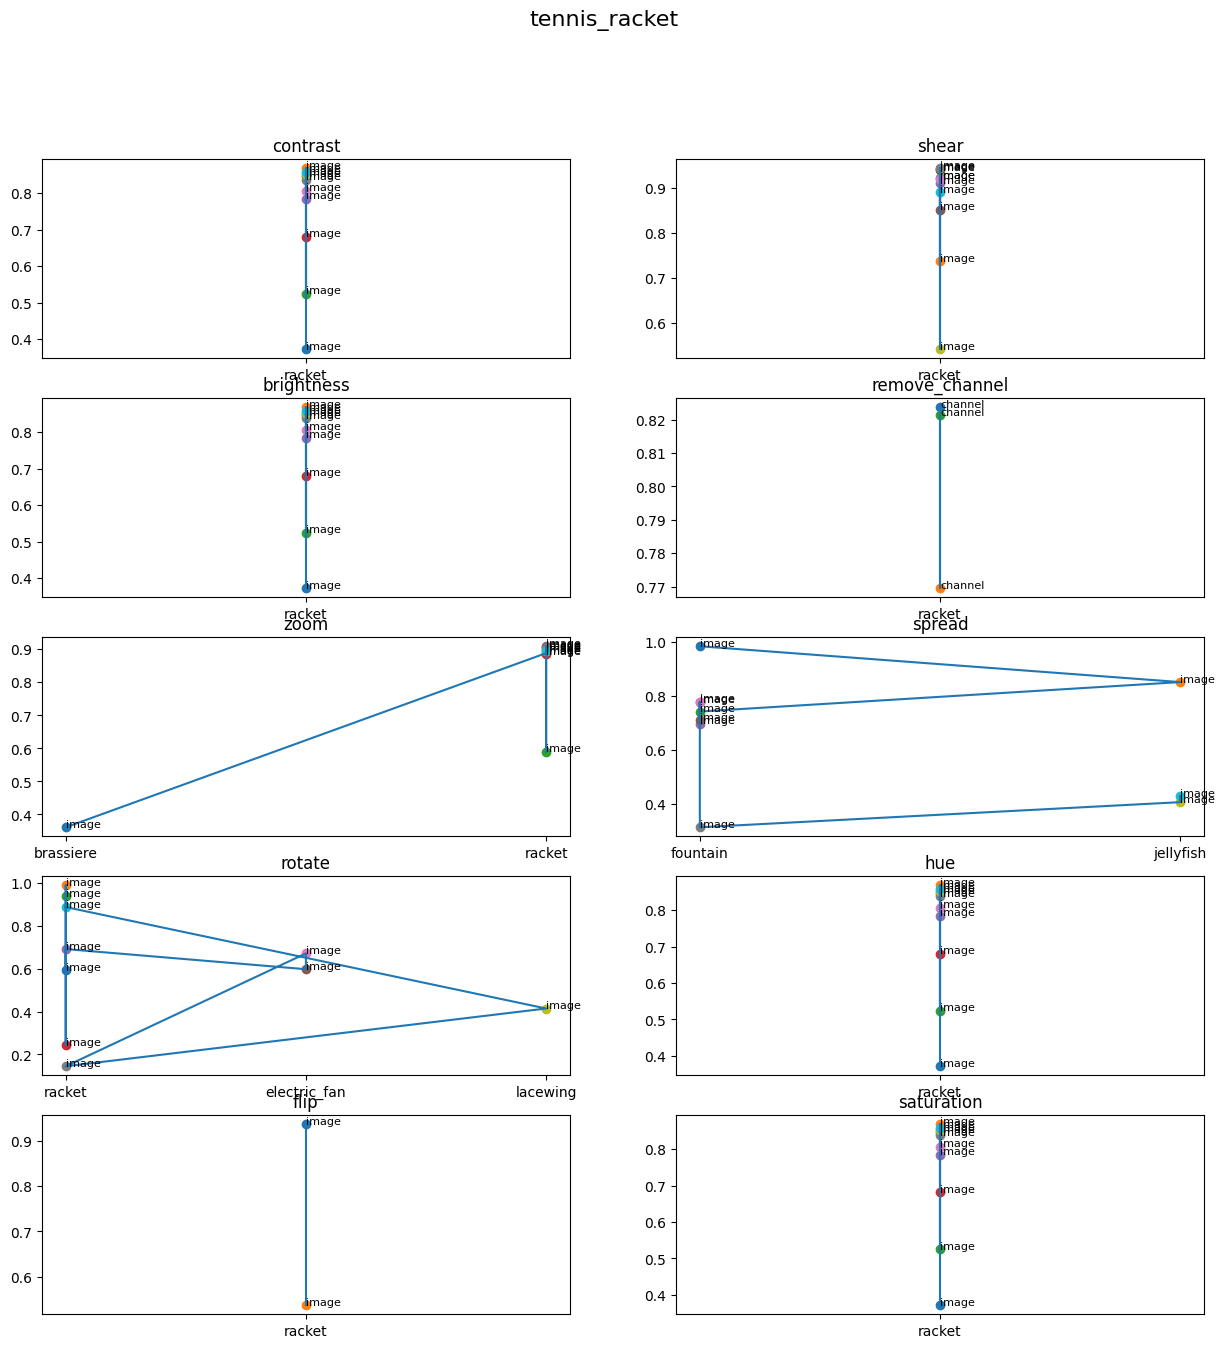

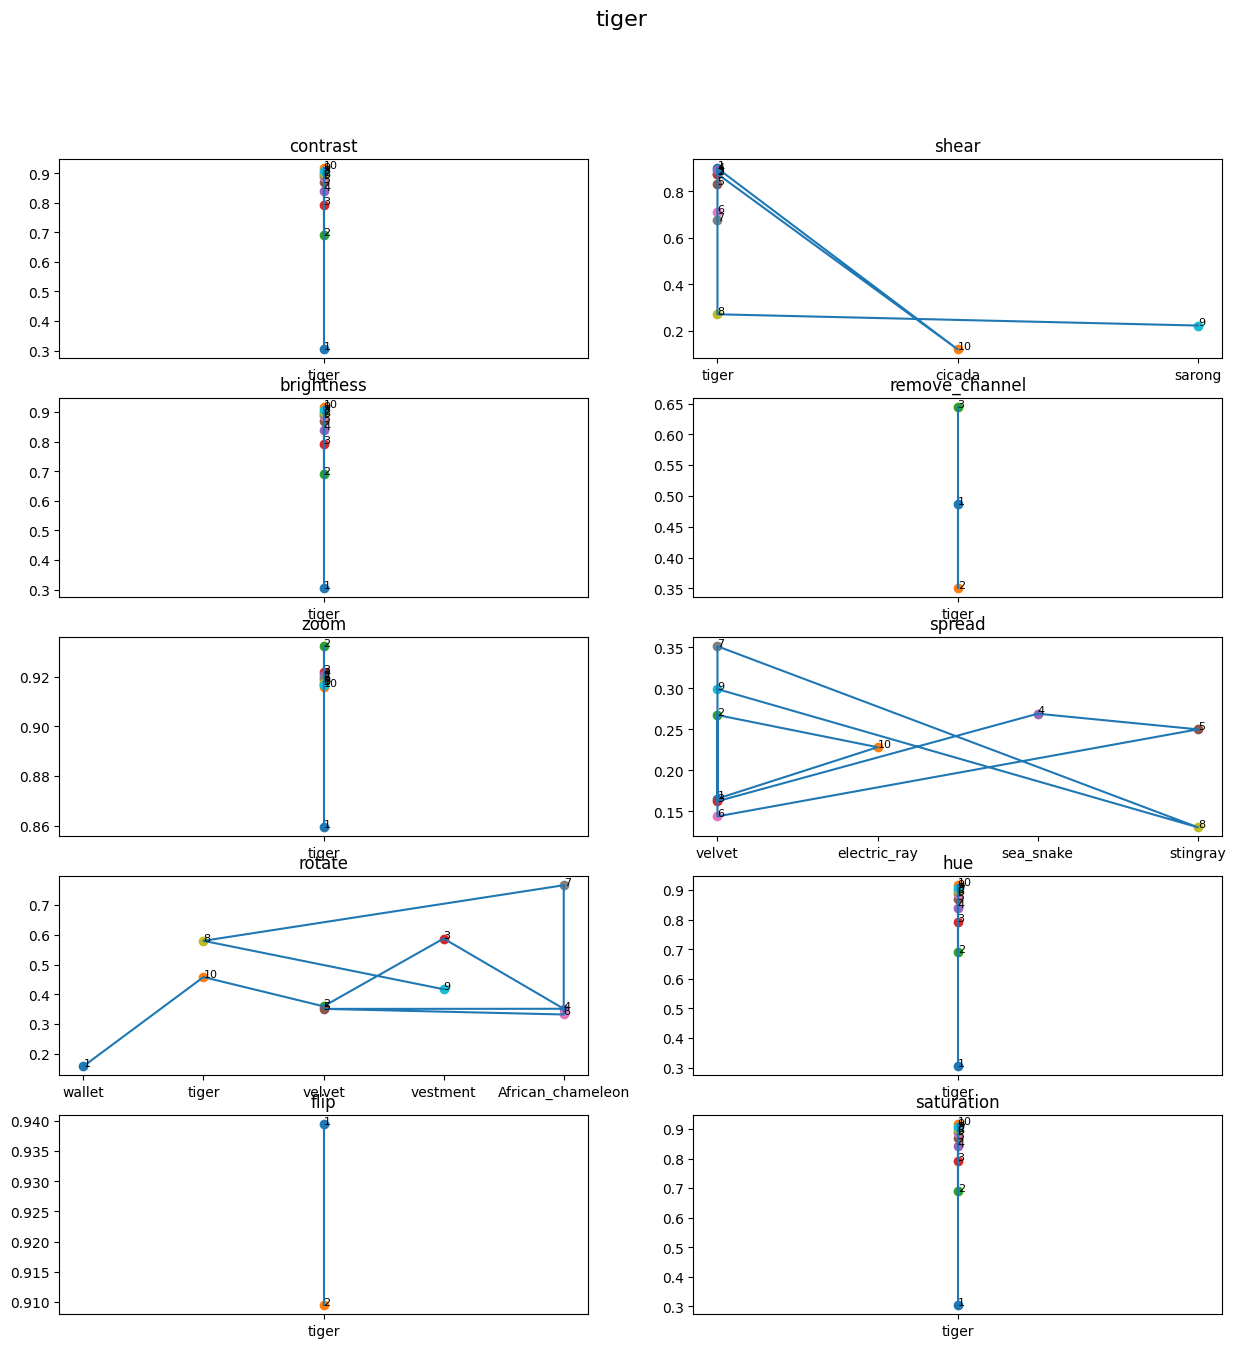

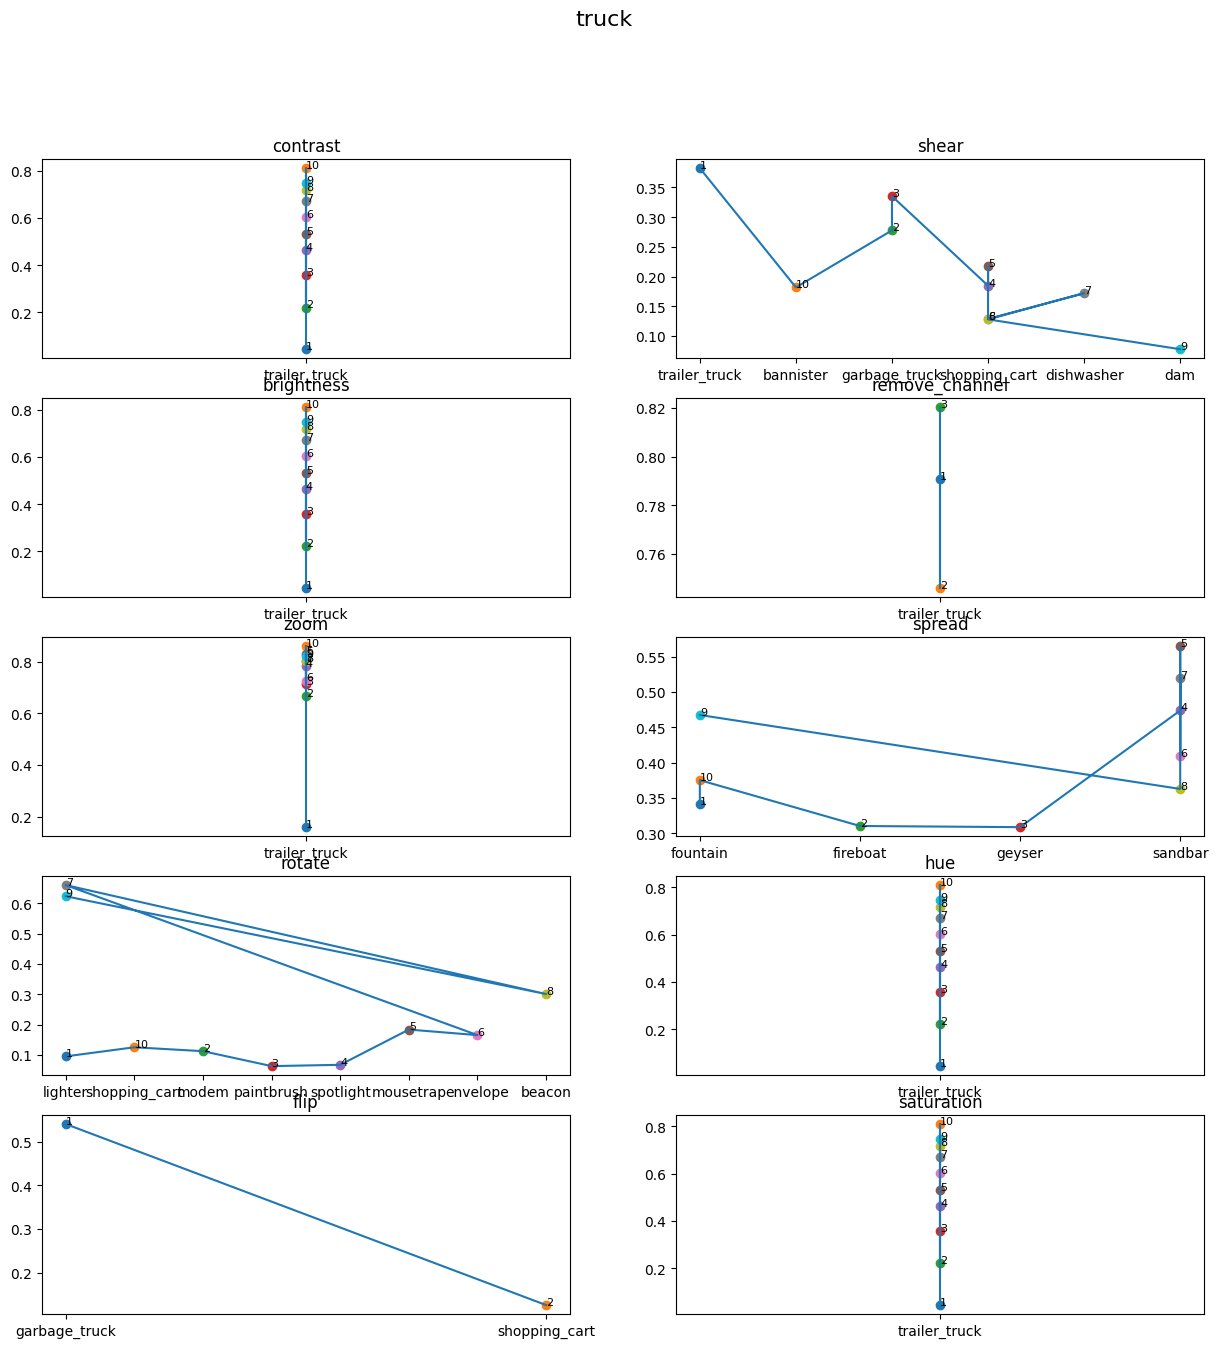

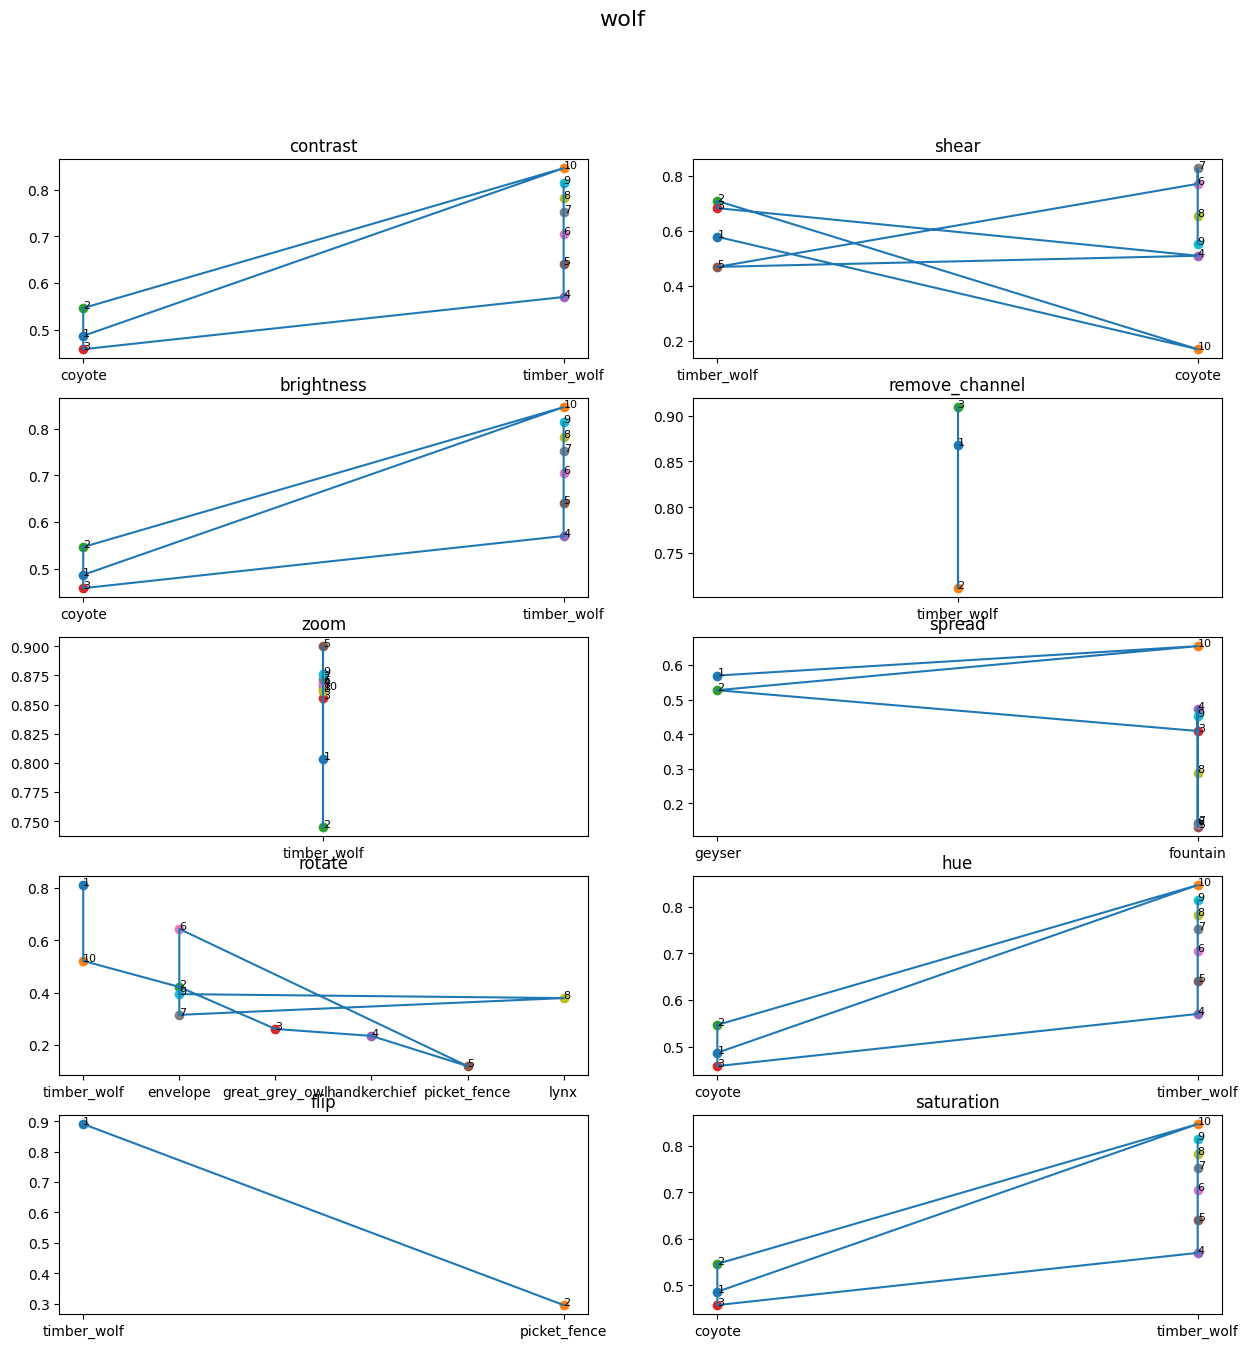

In [69]:
import matplotlib.pyplot as plt

def plot_predictions(predictions):
    for image, categories in predictions.items():
        fig, axs = plt.subplots(5, 2, figsize=(15, 15))
        fig.suptitle(f"{image}", fontsize=16)
        for i, (category, values) in enumerate(categories.items()):
            x = [value[0] for value in values.values()]
            y = [value[1] for value in values.values()]
            axs[i % 5, math.floor(i / 5)].plot(x, y)
            axs[i % 5, math.floor(i / 5)].set_title(category)
            # show dots for each prediction and show the filename for each dot
            for j, (filename, value) in enumerate(values.items()):
                axs[i % 5, math.floor(i / 5)].scatter(value[0], value[1])
                axs[i % 5, math.floor(i / 5)].text(value[0], value[1], filename.split('_')[3].split('.')[0], fontsize=8)
        plt.show()

plot_predictions(grouped_predictions)